In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import kruskal

from windrose import WindroseAxes
%matplotlib inline


### Load and Clean the Data

In [8]:
benin_df = pd.read_csv("../data/benin_clean.csv")
togo_df = pd.read_csv("../data/togo-dapaong_qc_clean.csv")
sierra_df = pd.read_csv("../data/sierraleone-bumbuna_clean.csv")

### Clean and Prepare the Data

In [9]:
columns_to_keep = ["Timestamp", "GHI", "DNI", "DHI"]
benin = benin_df[columns_to_keep].copy()
benin["Country"] = "Benin"
togo = togo_df[columns_to_keep].copy()
togo["Country"] = "Togo"

sierra = sierra_df[columns_to_keep].copy()
sierra["Country"] = "Sierra Leone"

###  Merge All and Remove Bad Values
#####  Merge all three countries into one big table
##### Negative values don't make sense for sunlight, so we remove those

In [10]:
df = pd.concat([benin, togo, sierra], ignore_index=True)
df = df[(df["GHI"] >= 0) & (df["DNI"] >= 0) & (df["DHI"] >= 0)]

#### Boxplots to Compare the Countries Visually
##### This creates three side-by-side boxplots, one for each metric
##### Each boxplot shows the median,the spread of the data,Outliers

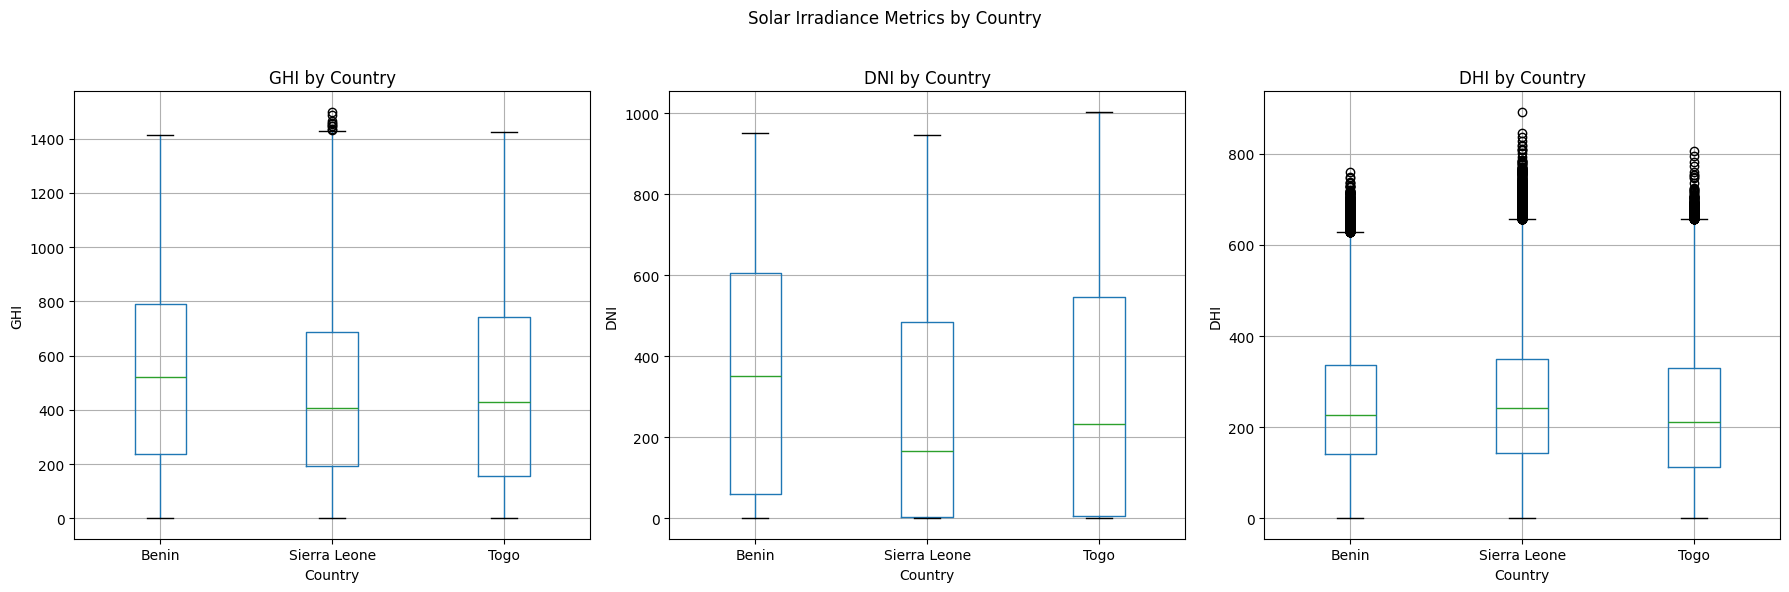

In [11]:
metrics = ["GHI", "DNI", "DHI"]
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    df.boxplot(column=metric, by="Country", ax=axes[i])
    axes[i].set_title(f"{metric} by Country")
    axes[i].set_xlabel("Country")
    axes[i].set_ylabel(metric)

plt.suptitle("Solar Irradiance Metrics by Country")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Summary Table of Statistics

In [12]:
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary



GHI                    DNI                     DHI         \
                mean median     std    mean  median     std    mean median   
Country                                                                      
Benin         513.41  520.3  304.77  356.48  352.25  279.73  247.40  227.8   
Sierra Leone  445.47  406.1  294.38  256.39  166.30  263.17  251.60  242.4   
Togo          454.08  430.3  319.10  296.41  233.80  283.53  228.17  211.4   

                      
                 std  
Country               
Benin         143.42  
Sierra Leone  141.63  
Togo          150.06

#### Kruskal–Wallis Test (Statistical Comparison)
##### This test checks if at least one country is significantly different from the others in GHI
##### We use Kruskal–Wallis instead of a normal t-test because our data may not be normally distributed
##### A small p-value  means differences are statistically significant which is in our case.

In [14]:

ghi_benin = df[df["Country"] == "Benin"]["GHI"]
ghi_sierra = df[df["Country"] == "Sierra Leone"]["GHI"]
ghi_togo = df[df["Country"] == "Togo"]["GHI"]

stat, p = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print("Kruskal-Wallis Test on GHI:")
print(f"Statistic = {stat:.2f}, p-value = {p:.4f}")


Kruskal-Wallis Test on GHI:
Statistic = 7607.27, p-value = 0.0000


 #### Bar Chart of Average GHI
 ##### Shows which country has the highest average GHI which best solar potintial.

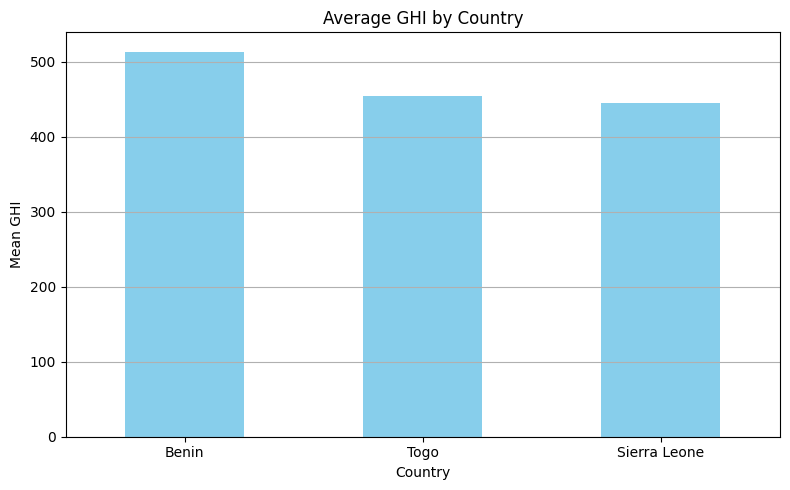

In [15]:
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
avg_ghi.plot(kind="bar", color="skyblue")
plt.title("Average GHI by Country")
plt.ylabel("Mean GHI")
plt.xlabel("Country")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### Key Insights
-  **Benin** has the highest GHI on average, making it the most promising for solar energy.
- **Sierra Leone** has low DNI, likely due to cloudiness or more diffuse sunlight.
-  **Togo** shows high variability in GHI, meaning sunlight is less consistent.
